In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [3]:
df['person_age'].max()

144

In [4]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [98]:
df['person_emp_length'].max()

38.0

In [6]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [7]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [99]:
df['loan_amnt'].max()

35000

In [9]:
df['loan_int_rate'].max()

23.22

In [10]:
df['loan_percent_income'].max()

0.83

In [11]:
df['cb_person_cred_hist_length'].max()

30

In [100]:
df['person_income'].max()

2039784

In [12]:
df.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [13]:
df.shape

(32581, 12)

In [14]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
missing_data_proportion = (df.isnull().sum() / len(df)) * 100
print(missing_data_proportion)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


check propotion of mkissign values for each variable.
Making the Decision:
If the missing data proportion is low (e.g., less than 5-10%):
Imputation is generally a good option.
If the missing data proportion is high:
Assess the impact of dropping the variable versus imputation.
If the variable is highly important:
Prefer imputation to preserve the variable's information.

In [16]:
#no columns have more than 40 percent of missing values we can replace them with imputations
drop_columns = df.columns[df.isnull().sum()/df.shape[0]*100 > 40]
print(drop_columns)

Index([], dtype='object')


In [17]:
skweness_emp_length = df['person_emp_length'].skew()
skweness_int_rate = df['loan_int_rate'].skew()

print(skweness_emp_length)
print(skweness_int_rate)

2.6144551214595424
0.2085503016908977


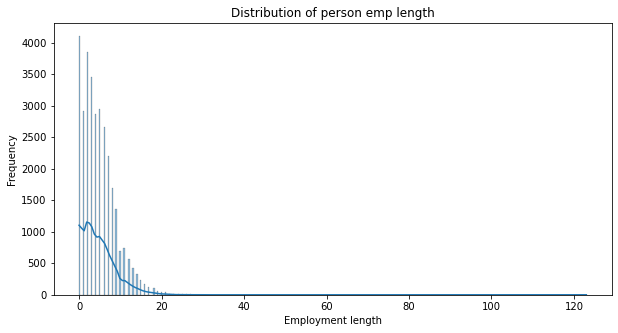

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['person_emp_length'],kde=True)
plt.title('Distribution of person emp length')
plt.xlabel('Employment length')
plt.ylabel('Frequency')
plt.show()

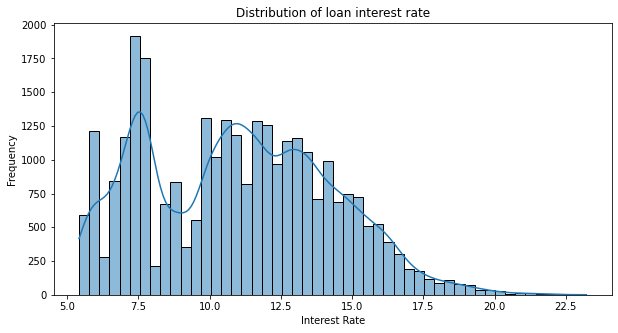

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_int_rate'],kde=True)
plt.title('Distribution of loan interest rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [20]:
credit_hist_length_sum = df.groupby('cb_person_cred_hist_length')['loan_amnt'].sum().reset_index()


In [21]:
credit_hist_length_sum

,cb_person_cred_hist_length,loan_amnt
0,2,55155575
1,3,55305250
2,4,55101350
3,5,18885800
4,6,18622500
5,7,18523750
6,8,19040650
7,9,18612500
8,10,18604950
9,11,4728725


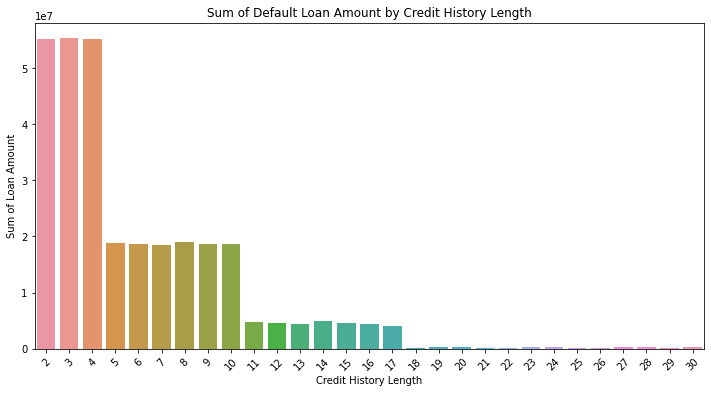

In [22]:
#barplot
plt.figure(figsize=(12,6))
sns.barplot(x='cb_person_cred_hist_length', y='loan_amnt', data=credit_hist_length_sum)
plt.title('Sum of Default Loan Amount by Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Sum of Loan Amount')
plt.xticks(rotation=45)
plt.show()

In [23]:
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [24]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)

In [25]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [26]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [27]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  349
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [28]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [30]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [31]:
numerical_data = df.select_dtypes(include='number')
numerical_features = numerical_data.columns.to_list()
print(len(numerical_features))
print(numerical_features)

8
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [32]:
categorical_data = df.select_dtypes(exclude='number')
categorical_features = categorical_data.columns.to_list()
print(len(categorical_features))
print(categorical_features)

4
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [33]:
categorical_data.describe().T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [34]:
numerical_data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [35]:
categorical_data

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [36]:
# df = df[df['person_emp_length'] != 123]

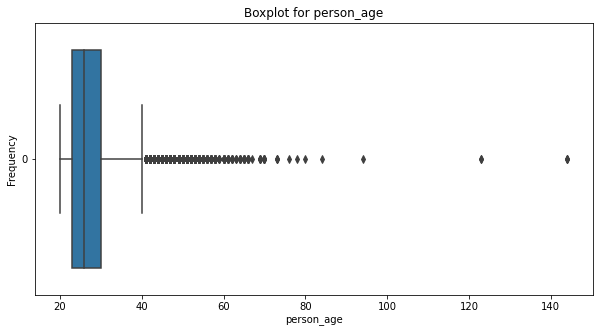

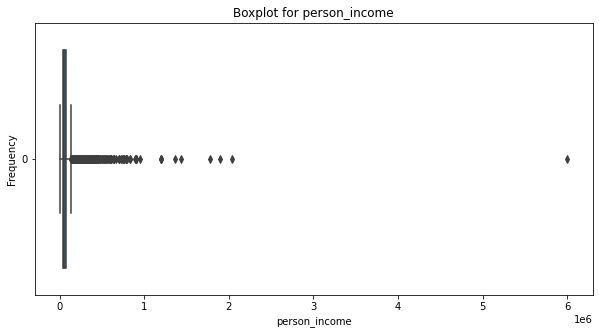

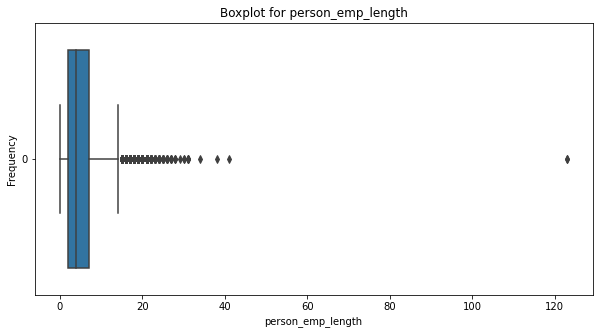

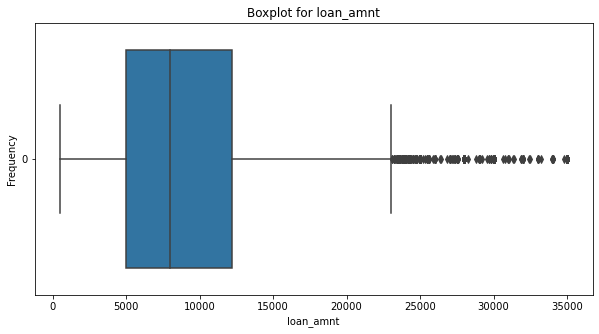

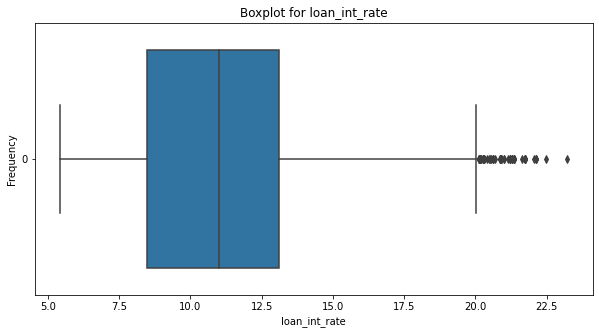

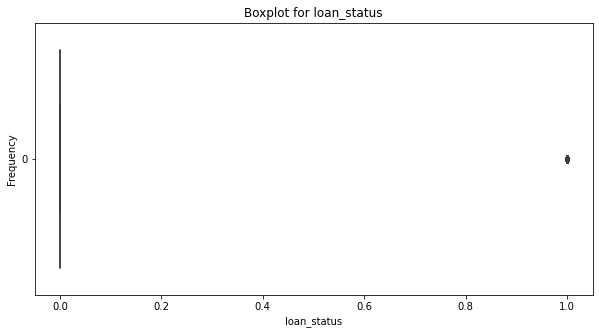

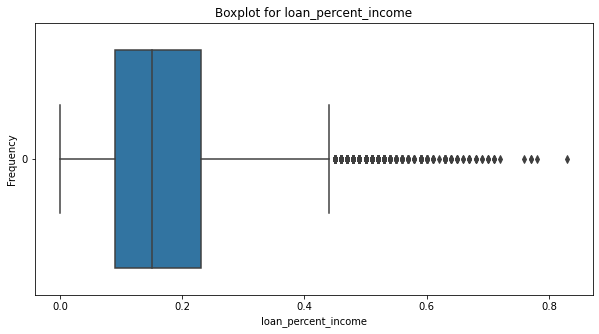

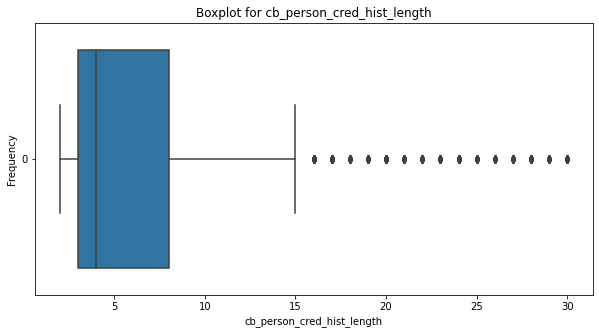

In [23]:
for features in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=numerical_data[features],orient='h')
    plt.title(f'Boxplot for {features}')
    plt.xlabel(f'{features}')
    plt.ylabel('Frequency')
    plt.show()

In [37]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [38]:
outliers_person_age = find_outliers(df, 'person_age')

In [39]:
outliers_person_age

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


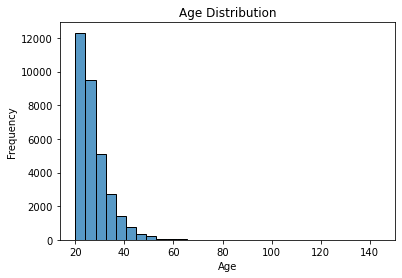

In [40]:
# Histogram with seaborn
sns.histplot(df['person_age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [41]:
df['person_age'].min()

20

In [42]:
#Dropping Ages greater than 70
df = df[df["person_age"]<70]

In [43]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [44]:
outliers_emp_len = find_outliers(df, 'person_income')

In [45]:
outliers_emp_len

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.650000,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.490000,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.850000,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.490000,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.880000,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,20
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,11.011695,0,0.00,N,21
32551,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,19
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.380000,0,0.15,N,21


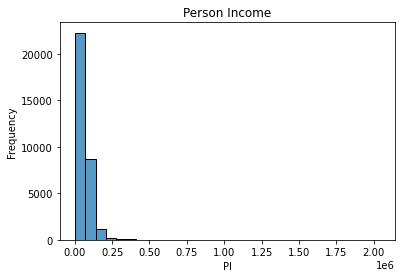

In [46]:
# Histogram with seaborn
sns.histplot(df['person_income'], bins=30, kde=False)
plt.title('Person Income')
plt.xlabel('PI')
plt.ylabel('Frequency')
plt.show()

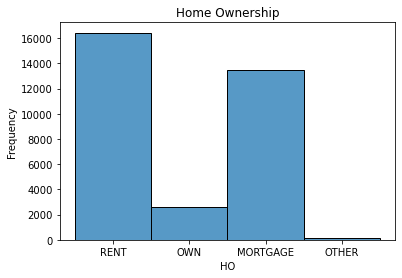

In [47]:
# Histogram with seaborn
sns.histplot(df['person_home_ownership'], bins=30, kde=False)
plt.title('Home Ownership')
plt.xlabel('HO')
plt.ylabel('Frequency')
plt.show()

In [48]:
outliers_emp_len = find_outliers(df, 'person_emp_length')

In [49]:
outliers_emp_len

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17847,35,500000,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,0.04,Y,7
17850,34,120000,RENT,17.0,VENTURE,B,35000,10.59,0,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23
32516,52,29000,OWN,23.0,PERSONAL,A,7000,7.49,0,0.24,N,20
32519,51,115900,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,0.10,N,29
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


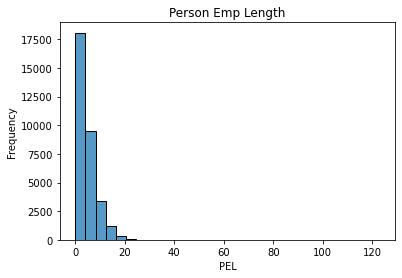

In [50]:
# Histogram with seaborn
sns.histplot(df['person_emp_length'], bins=30, kde=False)
plt.title('Person Emp Length')
plt.xlabel('PEL')
plt.ylabel('Frequency')
plt.show()

In [51]:
#how many rows greater than 40
df[df['person_emp_length'] > 40].shape[0]

2

In [52]:
df[df['person_emp_length'] > 40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [53]:
df = df[df['person_emp_length'] != 123]

In [54]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [58]:
# # #outliers of all columns total
# # for columns in numerical_data:
# all_outliers = find_outliers(df, column)

In [46]:
# all_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,11.011695,0,0.01,N,16
29125,37,80000,RENT,0.0,HOMEIMPROVEMENT,B,35000,11.990000,1,0.44,N,17
29127,44,584800,MORTGAGE,4.0,MEDICAL,C,20000,11.011695,1,0.03,Y,16
29130,37,85000,RENT,5.0,HOMEIMPROVEMENT,A,35000,8.900000,1,0.41,N,17
29133,41,480000,MORTGAGE,3.0,DEBTCONSOLIDATION,A,16000,7.900000,0,0.03,N,17
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


In [59]:
# Initialize a DataFrame to collect outliers
all_outliers = pd.DataFrame()

# Find and collect outliers for each numerical column
for column in numerical_features:
    outliers = find_outliers(df, column)
    all_outliers = pd.concat([all_outliers, outliers])

# Remove duplicate rows (if any) and reset index
all_outliers = all_outliers.drop_duplicates().reset_index(drop=True)

# Display total number of unique outliers
print(f"Total number of unique outliers across all numerical columns: {len(all_outliers)}")


Total number of unique outliers across all numerical columns: 11122


In [60]:
all_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
1,45,80000,RENT,10.0,MEDICAL,A,35000,11.011695,1,0.44,N,13
2,44,584800,MORTGAGE,4.0,MEDICAL,C,20000,11.011695,1,0.03,Y,16
3,43,500000,MORTGAGE,5.0,VENTURE,C,25000,12.610000,0,0.05,Y,14
4,41,480000,MORTGAGE,3.0,DEBTCONSOLIDATION,A,16000,7.900000,0,0.03,N,17
...,...,...,...,...,...,...,...,...,...,...,...,...
11117,40,46000,MORTGAGE,5.0,MEDICAL,A,10000,7.900000,0,0.22,N,16
11118,37,40000,OWN,1.0,HOMEIMPROVEMENT,B,15000,11.480000,0,0.38,N,17
11119,36,135000,MORTGAGE,1.0,VENTURE,D,2500,14.910000,0,0.02,N,17
11120,38,35000,RENT,0.0,DEBTCONSOLIDATION,B,5600,11.110000,0,0.16,N,17


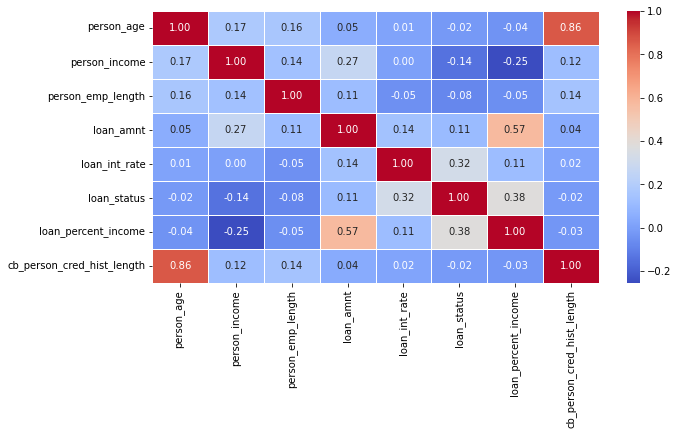

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(data=numerical_data.corr(),annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.show()

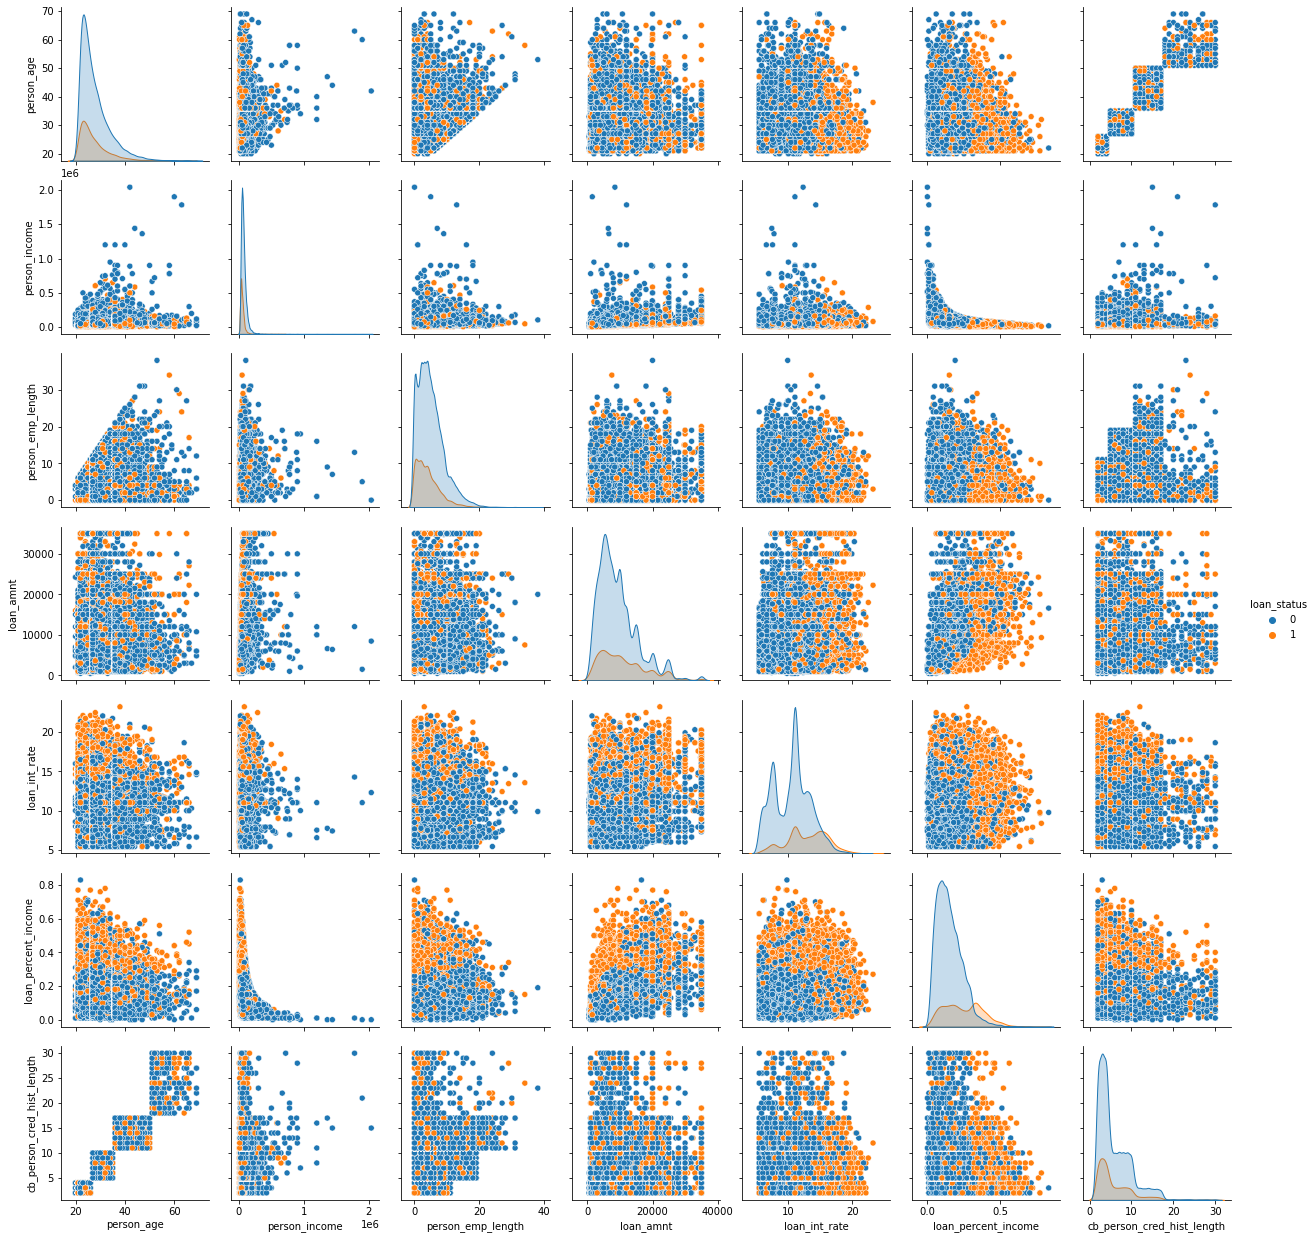

In [61]:
sns.pairplot(numerical_data, hue='loan_status')
plt.show()

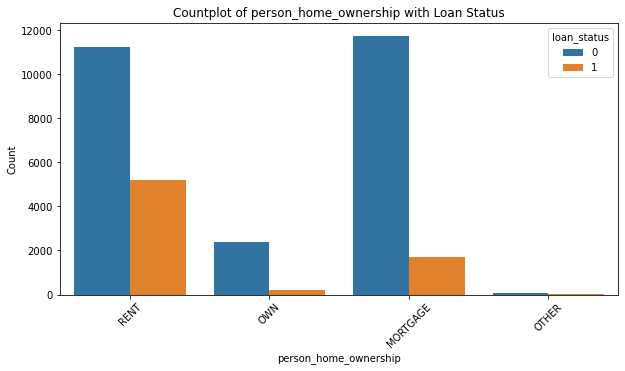

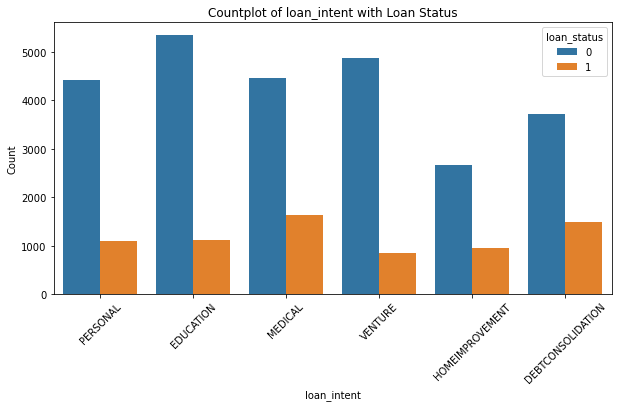

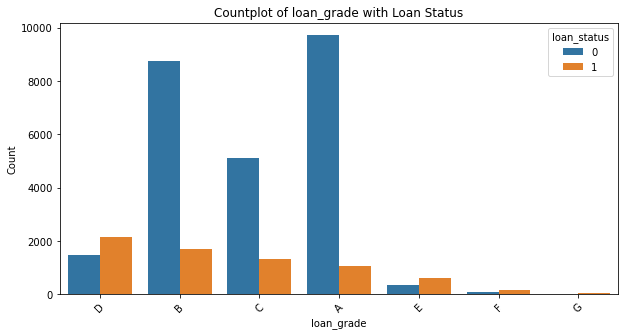

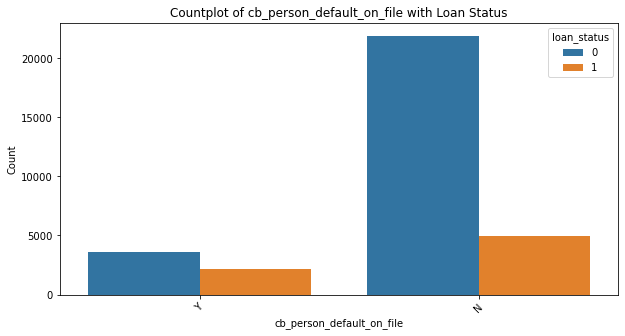

In [102]:
for category in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=categorical_data[category], hue=numerical_data['loan_status'])
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {category} with Loan Status')
    plt.xlabel(f'{category}')
    plt.ylabel('Count')
    plt.show()

In [63]:
# Aggregate data by employment length and calculate the sum of loan amounts
df_emp_len_sum = df.groupby('person_emp_length')['loan_amnt'].sum().reset_index()

In [64]:
df_emp_len_sum

,person_emp_length,loan_amnt
0,0.0,35076050
1,1.0,26565025
2,2.0,35099900
3,3.0,32780025
4,4.0,33634150
5,5.0,28444350
6,6.0,26067000
7,7.0,22158750
8,8.0,17660900
9,9.0,14968275


In [65]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32559.000000,3.255900e+04,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000,32559.000000
mean,27.696766,6.588340e+04,4.760005,9589.072146,11.011682,0.218219,0.170216,5.795633
std,6.122125,5.254014e+04,3.975062,6320.821658,3.081758,0.413043,0.106765,4.035198
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,69.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


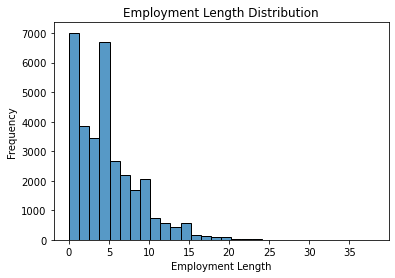

In [66]:
import seaborn as sns

# Histogram with seaborn
sns.histplot(df['person_emp_length'], bins=30, kde=False)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.show()


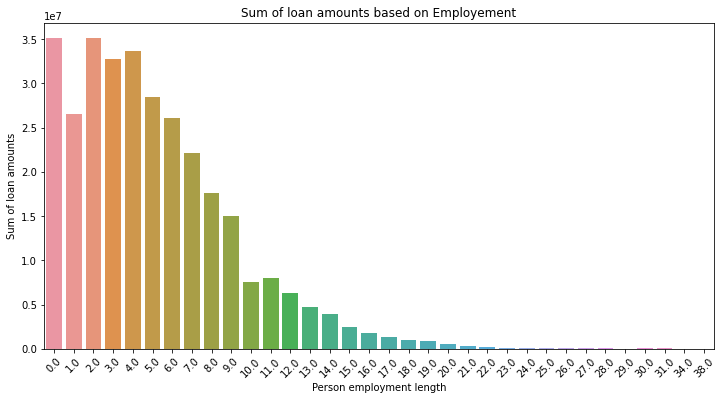

In [67]:
plt.figure(figsize =(12,6))
sns.barplot(x='person_emp_length',y='loan_amnt', data=df_emp_len_sum)
plt.title('Sum of loan amounts based on Employement')
plt.xlabel('Person employment length')
plt.ylabel('Sum of loan amounts')
plt.xticks(rotation=45)
plt.show()

In [68]:
class_counts = df.groupby('loan_status').size()
print(class_counts)

loan_status
0    25454
1     7105
dtype: int64


In [69]:
total_instances = class_counts.sum()
print(total_instances)

32559


In [70]:
percentages = (class_counts/total_instances)*100
print(percentages)

loan_status
0    78.178077
1    21.821923
dtype: float64


In [71]:
custom_palette = {0: 'blue', 1: 'yellow'}

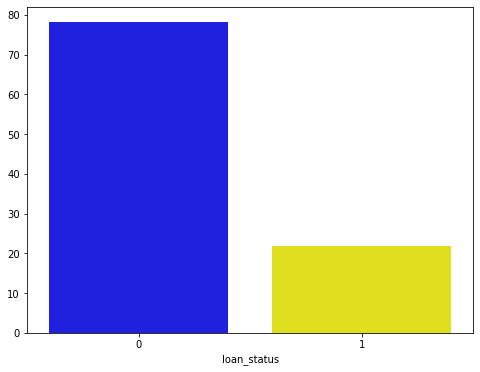

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x=class_counts.index,y=percentages, palette=custom_palette)
plt.show()

In [73]:
encoded_df = pd.get_dummies(df, columns=categorical_features)
encoded_df.head(20)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0,0,...,0,0,1,0,0,0,0,0,1,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0,0,...,0,0,1,0,0,0,0,0,1,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0,0,...,0,1,0,0,0,0,0,0,1,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,0,...,1,0,0,0,1,0,0,0,1,0
10,22,85000,6.0,35000,10.37,1,0.41,4,0,0,...,1,0,1,0,0,0,0,0,1,0


In [74]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32559 entries, 1 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32559 non-null  int64  
 1   person_income                   32559 non-null  int64  
 2   person_emp_length               32559 non-null  float64
 3   loan_amnt                       32559 non-null  int64  
 4   loan_int_rate                   32559 non-null  float64
 5   loan_status                     32559 non-null  int64  
 6   loan_percent_income             32559 non-null  float64
 7   cb_person_cred_hist_length      32559 non-null  int64  
 8   person_home_ownership_MORTGAGE  32559 non-null  uint8  
 9   person_home_ownership_OTHER     32559 non-null  uint8  
 10  person_home_ownership_OWN       32559 non-null  uint8  
 11  person_home_ownership_RENT      32559 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

In [75]:
encoded_df[encoded_df['loan_status']==0]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
14,23,115000,2.0,35000,7.90,0,0.30,4,0,0,...,0,1,0,0,0,0,0,0,1,0
15,23,500000,7.0,30000,10.65,0,0.06,3,1,0,...,0,0,1,0,0,0,0,0,1,0
16,23,120000,0.0,35000,7.90,0,0.29,4,0,0,...,0,1,0,0,0,0,0,0,1,0
20,25,162500,2.0,35000,7.49,0,0.22,4,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0.0,5000,11.26,0,0.08,20,0,0,...,0,0,1,0,0,0,0,0,1,0
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
class_count_0, class_count_1 = encoded_df['loan_status'].value_counts()
print(class_count_0)
print(class_count_1)
class_0 = encoded_df[encoded_df['loan_status']==0]
class_1 = encoded_df[encoded_df['loan_status']==1]
print(class_0.shape)
print(class_1.shape)

25454
7105
(25454, 27)
(7105, 27)


(14210, 27)
0    7105
1    7105
Name: loan_status, dtype: int64


<AxesSubplot:title={'center':'count(target)'}>

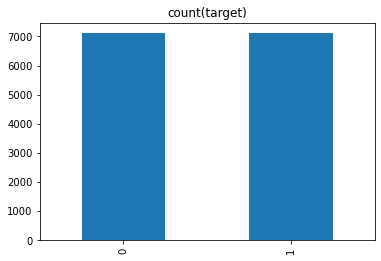

In [77]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under,class_1],axis=0)
print(test_under.shape)
print(test_under['loan_status'].value_counts())
# plot the count after under-sampeling
test_under['loan_status'].value_counts().plot(kind='bar',title = "count(target)")

(50946, 27)
1    25473
0    25473
Name: loan_status, dtype: int64


<AxesSubplot:title={'center':'count(target)'}>

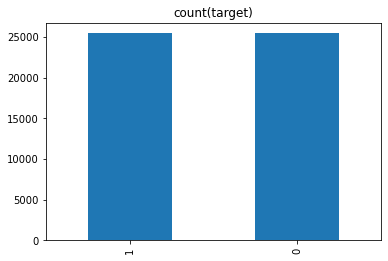

In [70]:
#oversampling
class_1_over = class_1.sample(class_count_0,replace=True)
test_over = pd.concat([class_1_over,class_0],axis=0)
print(test_over.shape)
print(test_over['loan_status'].value_counts())
test_over['loan_status'].value_counts().plot(kind='bar',title='count(target)')

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [79]:
X = test_under.drop(['loan_status'],axis=1)
y = test_under['loan_status']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
logistic_model = LogisticRegression()

In [35]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
pred_for_log_base = logistic_model.predict(X_train)

In [37]:
print(classification_report(y_train,pred_for_log_base))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4963
           1       0.73      0.76      0.75      4988

    accuracy                           0.74      9951
   macro avg       0.74      0.74      0.74      9951
weighted avg       0.74      0.74      0.74      9951



In [43]:
print(confusion_matrix(y_test,pred_for_log_base))

[[1479  666]
 [ 536 1584]]


In [49]:
from IPython.display import Image, display

# Display the image from a URL
url = 'https://miro.medium.com/v2/resize:fit:640/format:webp/1*g5zpskPaxO8uSl0OWT4NTQ.png'
display(Image(url=url))


Certainly! Let's break down **precision** and **recall** in simple terms with examples:

1. **Precision**:
   - Precision answers the question: "What proportion of positive identifications was actually correct?"
   - It measures how accurate the model is when it predicts a positive class (e.g., spam emails).
   - The formula for precision is:
     $$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{TP + False Positives (FP)}} $$
   - Example: Imagine an email spam filter. If it flags 10 emails as spam, but only 6 of them are truly spam, the precision is 60% (6 out of 10)⁶.

2. **Recall**:
   - Recall answers the question: "What proportion of actual positives was identified correctly?"
   - It measures how well the model captures all positive instances (e.g., all malignant tumors).
   - The formula for recall is:
     $$ \text{Recall} = \frac{\text{TP}}{\text{TP + False Negatives (FN)}} $$
   - Example: In the same tumor detection scenario, if there are 20 malignant tumors, but the model only identifies 2 of them, the recall is 10% (2 out of 20)⁶.

Remember, precision and recall are often in tension—improving one may reduce the other. Evaluating both metrics helps assess the overall effectiveness of a model! 😊

(1) Classification: Precision and Recall | Machine Learning | Google for .... https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall.
(2) Precision, Recall and F1 Explained (In Plain English). https://datagroomr.com/precision-recall-and-f1-explained-in-plain-english/.
(3) Precision and Recall — A simple explanation | by Tarang Shah - Medium. https://bing.com/search?q=explain+precision+and+recall+in+easy+words+with+example.
(4) Precision-Recall Tradeoff in Real-World Use Cases - Medium. https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases-c6de4fabbcd0.
(5) Precision vs Recall. What Do They Actually Tell You?. https://towardsai.net/p/l/precision-vs-recall-what-do-they-actually-tell-you.
(6) Precision and Recall Definition | DeepAI. https://deepai.org/machine-learning-glossary-and-terms/precision-and-recall.
(7) Precision and Recall — A simple explanation | by Tarang Shah - Medium. https://bing.com/search?q=precision+and+recall+explained+with+example.
(8) Precision and Recall — A simple explanation | by Tarang Shah - Medium. https://starang.medium.com/precision-and-recall-a-brief-intro-38589a21a09.
(9) Precision and Recall | Essential Metrics for Machine Learning. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/.
(10) Precision and Recall: Understanding the Trade-Off - Medium. https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942.

In [49]:
pip install --upgrade scikit-learn imbalanced-learn threadpoolctl


   ---------------------------------------- 11.0/11.0 MB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 258.3/258.3 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import imblearn
from collections import Counter

In [34]:
from imblearn.over_sampling import SMOTE


In [35]:
smote = SMOTE()

In [36]:
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [37]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 17851, 1: 4955})
Resample dataset shape Counter({0: 17851, 1: 17851})


# Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree_model = DecisionTreeClassifier()

In [40]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
dt_predictions = tree_model.predict(X_train)

In [42]:
print(classification_report(y_train,dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4963
           1       1.00      1.00      1.00      4988

    accuracy                           1.00      9951
   macro avg       1.00      1.00      1.00      9951
weighted avg       1.00      1.00      1.00      9951



In [49]:
print(confusion_matrix(y_test,dt_predictions))

[[1723  422]
 [ 403 1717]]


In [57]:
#preprunning

In [50]:
import numpy as np

In [82]:
#Preprunning
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':list(range(10, 51)),
    'max_features':['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0.001, 0.002, 100)
}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
random_search = RandomizedSearchCV(tree_model, parameters, n_iter=100, cv=5, scoring='accuracy', random_state=101)

In [85]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'ccp_alpha': array([0.001     , 0.0010101 , 0.0010202 , 0.0010303 , 0.0010404 ,
       0.00105051, 0.00106061, 0.00107071, 0.00108081, 0.00109091,
       0.00110101, 0.00111111, 0.00112121, 0.00113131, 0.00114141,
       0.00115152, 0.00116162, 0.00117172, 0.00118182, 0.00119192,
       0.00120202, 0.00121212, 0.00122...
       0.00190909, 0.00191919, 0.00192929, 0.00193939, 0.00194949,
       0.0019596 , 0.0019697 , 0.0019798 , 0.0019899 , 0.002     ]),
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   random_state=101, scoring='accuracy')

In [86]:
random_search.best_params_

{'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'log_loss',
 'ccp_alpha': 0.0018585858585858585}

In [87]:
pre_prdict = random_search.predict(X_test)

In [88]:
print(classification_report(y_test,pre_prdict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      2145
           1       0.90      0.70      0.79      2120

    accuracy                           0.81      4265
   macro avg       0.83      0.81      0.81      4265
weighted avg       0.83      0.81      0.81      4265



In [89]:
print(confusion_matrix(y_test,pre_prdict))

[[1984  161]
 [ 633 1487]]


In [79]:
from IPython.display import Image, display

# Display the image from a URL
url = 'https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b1f3_644af7fb04297049b7c31f63_classification_guide_apc17.png'
display(Image(url=url))

In [80]:
from IPython.display import Image, display

# Display the image from a URL
url = 'https://www.researchgate.net/publication/358029719/figure/fig2/AS:1115056309846018@1642861549455/Evaluation-metrics-accuracy-precision-recall-F-score-and-Intersection-over-Union.png'
display(Image(url=url))

In [90]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [91]:
ccp_alphas


array([0.00000000e+00, 6.18414848e-05, 6.22095889e-05, 6.25286124e-05,
       6.28077580e-05, 6.34688923e-05, 6.42034860e-05, 6.43151442e-05,
       6.48338147e-05, 6.49647921e-05, 6.51842678e-05, 6.53609189e-05,
       6.53609189e-05, 6.61134295e-05, 6.61469046e-05, 6.63381287e-05,
       7.39624158e-05, 7.53693096e-05, 7.53693096e-05, 7.87532378e-05,
       7.93498532e-05, 8.03939303e-05, 8.03939303e-05, 8.03939303e-05,
       8.03939303e-05, 8.03939303e-05, 8.25473391e-05, 8.37436774e-05,
       8.37436774e-05, 8.37436774e-05, 8.37436774e-05, 8.37436774e-05,
       8.37436774e-05, 8.37436774e-05, 8.50320416e-05, 8.61363538e-05,
       8.61363538e-05, 8.61363538e-05, 8.61363538e-05, 8.61363538e-05,
       8.70934244e-05, 8.79308612e-05, 8.79308612e-05, 8.79308612e-05,
       8.79308612e-05, 8.79308612e-05, 8.79308612e-05, 8.79308612e-05,
       8.93265892e-05, 8.93265892e-05, 8.93265892e-05, 8.93265892e-05,
       8.93265892e-05, 8.93265892e-05, 9.04431715e-05, 9.04431715e-05,
      

In [92]:
impurities

array([0.00000000e+00, 1.85524454e-04, 3.72153221e-04, 5.59739058e-04,
       7.48162332e-04, 9.38569009e-04, 1.13117947e-03, 1.32412490e-03,
       1.51862634e-03, 1.71352072e-03, 1.90907352e-03, 2.10515628e-03,
       2.30123904e-03, 2.49957933e-03, 2.69802004e-03, 2.89703443e-03,
       3.26684650e-03, 3.41758512e-03, 3.56832374e-03, 3.96208993e-03,
       4.35883920e-03, 4.51962706e-03, 4.68041492e-03, 4.84120278e-03,
       5.00199064e-03, 5.16277850e-03, 5.32787318e-03, 5.49536053e-03,
       5.66284789e-03, 5.83033524e-03, 5.99782260e-03, 6.16530995e-03,
       6.33279731e-03, 6.50028466e-03, 6.84041283e-03, 7.01268554e-03,
       7.18495824e-03, 7.35723095e-03, 7.52950366e-03, 7.70177637e-03,
       8.05015007e-03, 8.22601179e-03, 8.40187351e-03, 8.57773523e-03,
       8.75359695e-03, 8.92945868e-03, 9.10532040e-03, 9.28118212e-03,
       9.45983530e-03, 9.63848848e-03, 9.81714166e-03, 9.99579484e-03,
       1.01744480e-02, 1.03531012e-02, 1.05339875e-02, 1.07148739e-02,
      

The provided code snippet is designed to create a series of decision tree classifiers (`clfs`) using different values of `ccp_alpha` (cost complexity pruning parameter) and store them in a list. Here’s a breakdown of what the code does:

### Code Explanation

1. **Initialization**:
   - `clfs = []`: This initializes an empty list `clfs` where we will store multiple decision tree classifiers.

2. **Loop through `ccp_alphas`**:
   - `for ccp_alpha in ccp_alphas:`: This iterates over each value of `ccp_alpha` in the `ccp_alphas` array. Each `ccp_alpha` represents a different complexity parameter for cost complexity pruning.

3. **Create Decision Tree Classifier**:
   - `tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)`: Inside the loop, a new instance of `DecisionTreeClassifier` is created for each `ccp_alpha` value. The `ccp_alpha` parameter is set to the current value in the loop, which controls the amount of regularization (pruning) applied to the decision tree.

4. **Fit the Model**:
   - `tree_model.fit(X_train, y_train)`: The decision tree classifier (`tree_model`) is trained using the training data (`X_train`, `y_train`).

5. **Store the Classifier**:
   - `clfs.append(tree_model)`: After training, the trained classifier (`tree_model`) is added to the `clfs` list. This list will contain multiple decision tree classifiers, each trained with a different `ccp_alpha` value.

6. **Output Information**:
   - `print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))`: After the loop completes, this line prints out information about the last decision tree classifier (`clfs[-1]`) in the list:
     - `clfs[-1].tree_.node_count`: This retrieves the number of nodes in the tree (`tree_.node_count` attribute).
     - `ccp_alphas[-1]`: This retrieves the last value of `ccp_alpha` used in the loop.

### Purpose of the Code

The code snippet's main purpose is to:
- Train multiple decision tree classifiers (`clfs`) using different levels of cost complexity pruning (`ccp_alpha`).
- Store each trained classifier in a list (`clfs`).
- Print out information about the last trained classifier, specifically the number of nodes in its tree structure and the corresponding `ccp_alpha` value.

### Use Case

This approach allows you to explore how different levels of `ccp_alpha` affect the structure and performance of decision trees. By storing each classifier in `clfs`, you can later evaluate their performance on validation data or select the optimal `ccp_alpha` based on cross-validation results. This method is particularly useful for understanding the trade-offs between model complexity and performance when using cost complexity pruning with decision trees.

In [93]:
clfs = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    clfs.append(tree_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08034841931394071


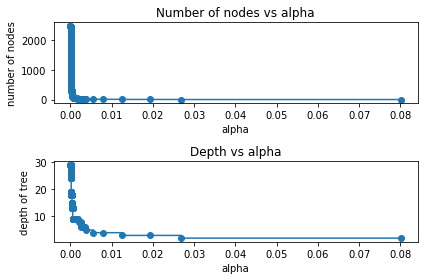

In [94]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree_model.tree_.node_count for tree_model in clfs]
depth = [tree_model.tree_.max_depth for tree_model in clfs]
fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The image you've displayed shows two subplots depicting the relationship between the cost complexity pruning parameter (`alpha` or `ccp_alpha`) and the characteristics of decision trees: the number of nodes and the depth of the tree.

### Interpretation of the Plots:

1. **Number of Nodes vs. Alpha (Cost Complexity Pruning Parameter)**:
   - **X-axis (Alpha)**: This represents the values of the cost complexity pruning parameter (`ccp_alpha`), which controls the trade-off between the complexity of the tree and its ability to generalize.
   - **Y-axis (Number of Nodes)**: Indicates the total number of decision nodes in the decision tree.
   - **Trend**: As the value of `ccp_alpha` increases (moving from left to right on the x-axis), fewer nodes are present in the decision tree. This reduction occurs because higher values of `ccp_alpha` encourage more aggressive pruning of less informative nodes, leading to simpler tree structures with fewer decision points.

2. **Depth of Tree vs. Alpha (Cost Complexity Pruning Parameter)**:
   - **X-axis (Alpha)**: Represents the same cost complexity pruning parameter (`ccp_alpha`) values.
   - **Y-axis (Depth of Tree)**: Indicates the maximum depth of the decision tree, which measures the longest path from the root to a leaf node.
   - **Trend**: Similar to the number of nodes plot, as `ccp_alpha` increases, the depth of the decision tree decreases. Higher values of `ccp_alpha` promote pruning of branches and nodes, resulting in shallower trees that are less likely to overfit to the training data.

### Insights from the Plots:

- **Optimal Alpha Selection**: These plots help in selecting an optimal value of `ccp_alpha` that balances model complexity and performance. A value where the number of nodes and tree depth stabilize or plateau can indicate a good balance between model simplicity (to avoid overfitting) and sufficient complexity (to capture important patterns in the data).

- **Model Interpretability**: Shallower trees (lower depth) with fewer nodes are often more interpretable because they capture fewer intricate details of the training data, focusing on the most significant features and relationships.

- **Generalization**: By reducing the complexity of the decision tree through pruning (`ccp_alpha`), the model can generalize better to unseen data, improving its predictive performance on test datasets.

### Practical Use:

- Use these insights to guide the selection of `ccp_alpha` when training decision tree models, especially in situations where overfitting is a concern due to complex relationships in the data or limited training data size.

- Experiment with different values of `ccp_alpha`, observe how they affect the tree structure (number of nodes and depth), and validate their impact on model performance using cross-validation techniques or separate validation datasets.

Overall, these plots provide a visual representation of how adjusting `ccp_alpha` influences the complexity and performance of decision tree models, aiding in the optimization of model parameters for better predictive outcomes.

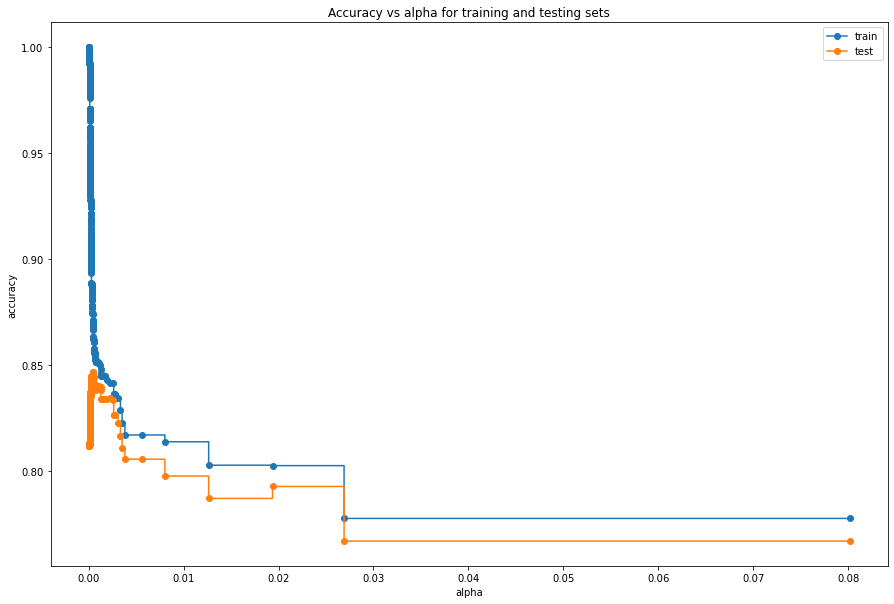

In [95]:
train_scores = [tree_model.score(X_train, y_train) for tree_model in clfs]
test_scores = [tree_model.score(X_test, y_test) for tree_model in clfs]

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [96]:
tree_model = DecisionTreeClassifier(random_state=101, ccp_alpha=0.03)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=101)

In [97]:
post_predictions = tree_model.predict(X_test)

In [98]:
print(classification_report(y_test,post_predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2145
           1       0.82      0.68      0.74      2120

    accuracy                           0.77      4265
   macro avg       0.78      0.77      0.76      4265
weighted avg       0.78      0.77      0.76      4265



In [99]:
print(confusion_matrix(y_test,post_predictions))

[[1838  307]
 [ 688 1432]]


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
classifier = RandomForestClassifier(random_state=101)

In [40]:
X = test_under.drop(['loan_status'],axis=1)
y = test_under['loan_status']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [42]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [43]:
random_predict_base = classifier.predict(X_test)

In [44]:
print(classification_report(random_predict_base,y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2450
           1       0.78      0.91      0.84      1815

    accuracy                           0.85      4265
   macro avg       0.85      0.86      0.85      4265
weighted avg       0.86      0.85      0.85      4265



In [45]:
print(confusion_matrix(random_predict_base,y_test))

[[1980  470]
 [ 165 1650]]


# XGBOOST

In [81]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [82]:
xgb_model = xgb.XGBClassifier()

In [83]:
X = test_under.drop(['loan_status'],axis=1)
y = test_under['loan_status']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [85]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
xgb_model_base_pred = xgb_model.predict(X_train)

In [49]:
print(classification_report(xgb_model_base_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5249
           1       0.93      0.99      0.96      4702

    accuracy                           0.96      9951
   macro avg       0.96      0.96      0.96      9951
weighted avg       0.96      0.96      0.96      9951



In [59]:
print(confusion_matrix(xgb_model_base_pred,y_test))

[[1968  391]
 [ 177 1729]]


In [86]:
param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'lambda': loguniform(1e-4, 1e1),  # L2 regularization (from very small to higher values)
    'alpha': loguniform(1e-4, 1e1),   # L1 regularization
}

In [87]:
random_searchcv = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=2, random_state=101)

In [88]:
random_searchcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=0.03819382364892783, colsample_bytree=0.9, lambda=5.7999171503451, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=0.03819382364892783, colsample_bytree=0.9, lambda=5.7999171503451, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=0.03819382364892783, colsample_bytree=0.9, lambda=5.7999171503451, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=0.03819382364892783, colsample_bytree=0.9, lambda=5.7999171503451, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=0.03819382364892783, colsample_bytree=0.9, lambda=5.7999171503451, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END alpha=0.0034263450650962434, colsample_bytree=0.8, lambda=0.0021426083802494823, learning_rate

[CV] END alpha=0.0004901865964250323, colsample_bytree=0.9, lambda=0.00040009976899992164, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END alpha=0.0004901865964250323, colsample_bytree=0.9, lambda=0.00040009976899992164, learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END alpha=0.030773110777403107, colsample_bytree=0.8, lambda=2.4430740073812043, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END alpha=0.030773110777403107, colsample_bytree=0.8, lambda=2.4430740073812043, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END alpha=0.030773110777403107, colsample_bytree=0.8, lambda=2.4430740073812043, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END alpha=0.030773110777403107, colsample_bytree=0.8, lambda=2.4430740073812043, learning_rate=0.1, max_depth=5, n_estimators=200, 

[CV] END alpha=0.0004433045606380507, colsample_bytree=0.9, lambda=0.041838805033096414, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=0.0004433045606380507, colsample_bytree=0.9, lambda=0.041838805033096414, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=0.0004433045606380507, colsample_bytree=0.9, lambda=0.041838805033096414, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=0.0004433045606380507, colsample_bytree=0.9, lambda=0.041838805033096414, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=1.4097427612703939, colsample_bytree=0.8, lambda=5.143946514924092, learning_rate=0.001, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END alpha=1.4097427612703939, colsample_bytree=0.8, lambda=5.143946514924092, learning_rate=0.001, max_depth=3, n_estimators=50, subsam

[CV] END alpha=0.00016751140430694937, colsample_bytree=0.9, lambda=0.20334124614048174, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END alpha=0.00016751140430694937, colsample_bytree=0.9, lambda=0.20334124614048174, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END alpha=0.00016751140430694937, colsample_bytree=0.9, lambda=0.20334124614048174, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END alpha=0.00016751140430694937, colsample_bytree=0.9, lambda=0.20334124614048174, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END alpha=0.00016751140430694937, colsample_bytree=0.9, lambda=0.20334124614048174, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END alpha=0.0032417899277404345, colsample_bytree=0.8, lambda=0.0017138230049099804, learning_rate=0.001, max_depth=5, n_estimator

[CV] END alpha=0.017062320233878304, colsample_bytree=1.0, lambda=0.5997943934434206, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END alpha=0.017062320233878304, colsample_bytree=1.0, lambda=0.5997943934434206, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END alpha=0.013242287704140125, colsample_bytree=1.0, lambda=0.13007652018998261, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END alpha=0.013242287704140125, colsample_bytree=1.0, lambda=0.13007652018998261, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END alpha=0.013242287704140125, colsample_bytree=1.0, lambda=0.13007652018998261, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END alpha=0.013242287704140125, colsample_bytree=1.0, lambda=0.13007652018998261, learning_rate=0.001, max_depth=5, n_estimators=200, 

[CV] END alpha=0.0004957217919048214, colsample_bytree=0.9, lambda=0.00011553967946508053, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END alpha=0.0004957217919048214, colsample_bytree=0.9, lambda=0.00011553967946508053, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END alpha=0.0004957217919048214, colsample_bytree=0.9, lambda=0.00011553967946508053, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END alpha=0.0004957217919048214, colsample_bytree=0.9, lambda=0.00011553967946508053, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END alpha=0.3412427610915175, colsample_bytree=0.9, lambda=0.22139084048587584, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END alpha=0.3412427610915175, colsample_bytree=0.9, lambda=0.22139084048587584, learning_rate=0.01, max_depth=4, n_estimators=

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002899C400A60>,
                                        'colsample_bytree': [0.8, 0.9, 1.0],
                                        'lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002899D0AA220>,
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=101, scoring='accuracy', verbose=2)

In [89]:
random_searchcv.best_params_

{'alpha': 0.0004270946305397705,
 'colsample_bytree': 0.9,
 'lambda': 0.009871772300990275,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

In [90]:
xgb_model_undersample = random_searchcv.predict(X_test)

In [91]:
print(classification_report(xgb_model_undersample,y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2382
           1       0.80      0.91      0.85      1881

    accuracy                           0.86      4263
   macro avg       0.86      0.87      0.86      4263
weighted avg       0.87      0.86      0.86      4263



In [92]:
random_searchcv.feature_names_in_

array(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
       'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'], dtype='<U30')

In [101]:
xgb_model_undersample = random_searchcv.predict(X_train)

In [102]:
print(classification_report(xgb_model_undersample,y_train))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5498
           1       0.86      0.96      0.91      4449

    accuracy                           0.91      9947
   macro avg       0.91      0.92      0.91      9947
weighted avg       0.92      0.91      0.91      9947



In [103]:
print(confusion_matrix(xgb_model_undersample,y_train))

[[4796  702]
 [ 165 4284]]


In [93]:
print(confusion_matrix(xgb_model_undersample,y_test))

[[1968  414]
 [ 176 1705]]


In [94]:
import joblib 

# save model with joblib 
filename = 'xgboost_model.joblib'
joblib.dump(random_searchcv, filename)

['xgboost_model.joblib']

In [95]:
best_model = joblib.load('xgboost_model.joblib')

In [96]:
final_model_results = best_model.predict(X_test)

In [97]:
print(classification_report(final_model_results, y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2382
           1       0.80      0.91      0.85      1881

    accuracy                           0.86      4263
   macro avg       0.86      0.87      0.86      4263
weighted avg       0.87      0.86      0.86      4263



In [108]:
from sklearn.metrics import roc_curve, auc

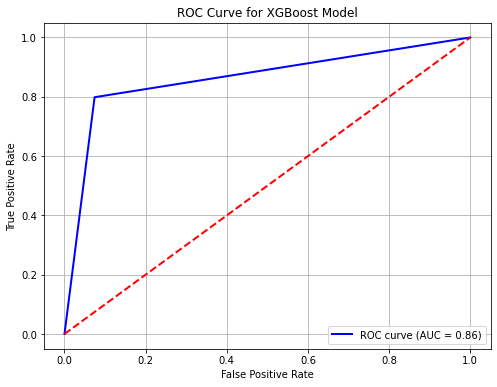

In [112]:
# Assuming you have predictions (xgboost_pred) and true labels (y_test) for XGBoost model
fpr, tpr, _ = roc_curve(y_test, xgb_model_undersample)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

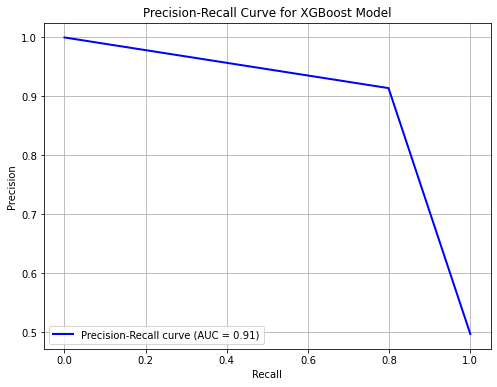

In [113]:
from sklearn.metrics import precision_recall_curve
# Assuming you have predictions (xgboost_pred) and true labels (y_test) for XGBoost model
precision, recall, _ = precision_recall_curve(y_test, xgb_model_undersample)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost Model')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [114]:
best_parameters = random_searchcv.best_estimator_

Top 15 features:
                           feature  importance
10      person_home_ownership_RENT    0.125971
5              loan_percent_income    0.080384
20                    loan_grade_D    0.076115
19                    loan_grade_C    0.074875
17                    loan_grade_A    0.062737
9        person_home_ownership_OWN    0.061507
4                    loan_int_rate    0.059927
1                    person_income    0.048248
7   person_home_ownership_MORTGAGE    0.046598
13     loan_intent_HOMEIMPROVEMENT    0.044068
11   loan_intent_DEBTCONSOLIDATION    0.043115
16             loan_intent_VENTURE    0.040514
3                        loan_amnt    0.030846
14             loan_intent_MEDICAL    0.030354
18                    loan_grade_B    0.027337


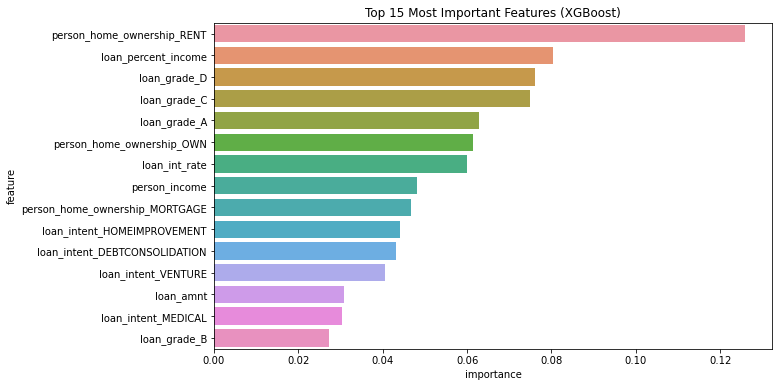

In [115]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_parameters.feature_importances_
}).sort_values('importance', ascending=False)

# Print the top features
print("Top 15 features:")
print(feature_importance.head(15))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (XGBoost)')
plt.show()

# ANN

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU 
from tensorflow.keras.layers import Input
import tensorflow
from tensorflow.keras import regularizers

In [268]:
X = test_under.drop(['loan_status'],axis=1)
y = test_under['loan_status']


In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

In [271]:
sequential_model = Sequential()

In [272]:
sequential_model.add(Input(shape=(X_train.shape[1],)))
sequential_model.add(Dropout(0.2))

In [273]:
sequential_model.add(Dense(units=64, activation='relu'))
sequential_model.add(Dropout(0.2))

In [274]:
sequential_model.add(Dense(units=32, activation='relu'))
sequential_model.add(Dropout(0.2))

In [275]:
# sequential_model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# sequential_model.add(Dropout(0.3))

In [276]:
sequential_model.add(Dense(1, activation='sigmoid'))

In [277]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [278]:
sequential_model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [284]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [285]:
model_history = sequential_model.fit(X_train, y_train, validation_split=0.3, batch_size = 64, epochs=100,callbacks=early_stop)

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8121 - loss: 0.4063 - val_accuracy: 0.8111 - val_loss: 0.4116
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.4035 - val_accuracy: 0.8225 - val_loss: 0.3748
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.4052 - val_accuracy: 0.8135 - val_loss: 0.3809
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8147 - loss: 0.4070 - val_accuracy: 0.8192 - val_loss: 0.3803
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.3881 - val_accuracy: 0.8175 - val_loss: 0.3796
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.4107 - val_accuracy: 0.8078 - val_loss: 0.4056
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.3949 - val_accuracy: 0.8165 - val_loss: 0.3870
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.3973 - val_accu

In [286]:
#prediction

predictions = sequential_model.predict(X_test)
predictions = (predictions >= 0.5).astype(int)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [287]:
print(accuracy_score(y_test,predictions))

0.8269636576787808


In [288]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2145
           1       0.92      0.71      0.80      2120

    accuracy                           0.83      4265
   macro avg       0.84      0.83      0.82      4265
weighted avg       0.84      0.83      0.82      4265



In [289]:
print(confusion_matrix(y_test,predictions))

[[2018  127]
 [ 611 1509]]


In [290]:
predictions_train = sequential_model.predict(X_train)
predictions_train = (predictions_train >= 0.5).astype(int)

311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [291]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      4963
           1       0.94      0.74      0.83      4988

    accuracy                           0.84      9951
   macro avg       0.86      0.84      0.84      9951
weighted avg       0.86      0.84      0.84      9951

